<a href="https://colab.research.google.com/github/joycedenny/introduction-to-python/blob/main/python16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("titanic.csv")

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
count=len(dataset)
print(count)

891


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print('Median of Age column:%.2f'%(dataset['Age'].median(skipna=True)))
print('Percent of missing record in cabin column:%.2f%%' % ((dataset['Cabin'].isnull().sum()/len(dataset))*100))
print('Most common boarding part of embarkation:%s' %dataset['Embarked'].value_counts().idxmax())

Median of Age column:28.00
Percent of missing record in cabin column:77.10%
Most common boarding part of embarkation:S


In [11]:
dataset["Age"].fillna(dataset["Age"].median(skipna=True),inplace=True)
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)
dataset.drop("Cabin",axis=1,inplace=True)

In [12]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
dataset.drop('PassengerId',axis=1,inplace=True)
dataset.drop('Name', axis=1,inplace=True)
dataset.drop('Ticket',axis=1,inplace=True)

In [18]:
dataset['Travelalone']=np.where((dataset['SibSp']+(dataset)['Parch'])>0,0,1)
dataset.drop('SibSp',axis=1,inplace=True)
dataset.drop('Parch',axis=1,inplace=True)

In [20]:
print(dataset.head())
dataset.shape
dataset.info()

   Survived  Pclass     Sex   Age     Fare Embarked  Travel Alone  Travelalone
0         0       3    male  22.0   7.2500        S             0            0
1         1       1  female  38.0  71.2833        C             0            0
2         1       3  female  26.0   7.9250        S             1            1
3         1       1  female  35.0  53.1000        S             0            0
4         0       3    male  35.0   8.0500        S             1            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   Travel Alone  891 non-null    int64  
 7   Travelalone   891 non-null    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

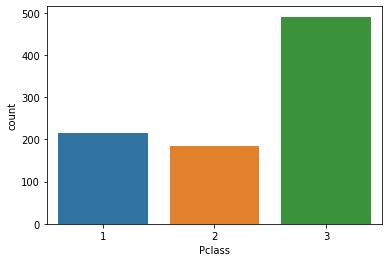

In [21]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


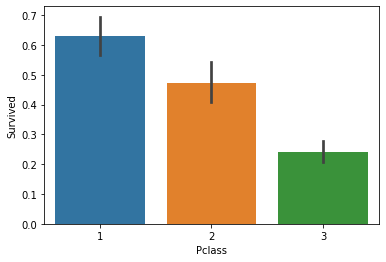

In [22]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()